# Project on Invitation Topology



### Data construction
- As a concern of data privacy protection, I am not using the real data, but using the constructed dataset with similar structure.
- show the sample data structure of invitationship dataset :

| user_id | invited_user_id |
| ------- | --------------- |
| 1660      | 8540         |
| 8540       | 3839         |
| 1520      | 3717         |
| 3839     | 7938          |
| 1520      | 2276         |
| 8540      | 8467          |


- so here we can see two chain of invitations:
```
    1660
    └── 8540
        └── 8467
        └── 3839
            └── 7938
                └── 2276
                
The other tree 

    1520
    └── 3717
    └── 2276
    
```

In [1]:
# Generate sample data for invitation codes
import random

# generate a list of 6-digit numerical random strings as the value of column2 
column2_values = random.sample(range(1000, 9999), 6000)

# generate a list of tuples (column1, column2)
data = []
for value in column2_values:
    # generate column1 value, allow repetition
    column1_value = str(random.randint(1000,2000))
    data.append((column1_value, str(value)))

# make sure column2 values are unique and the first occurrence of a value should be later than the occurrence in column2
random.shuffle(data)
result = []
seen_values = set()
for row in data:
    column1, column2 = row
    if column2 not in seen_values and column1 != column2:
        result.append((column1, column2))
        seen_values.add(column2)
print(result)

[('1339', '2283'), ('1509', '2988'), ('1762', '8605'), ('1842', '7330'), ('1469', '9163'), ('1667', '4003')]


### Creates a forest of trees from a list of invitations.

In [19]:
# This code creates a forest of trees from a list of invitations.
import pandas as pd
import numpy as np

# Create a dictionary of lists
invitationship = pd.DataFrame(result,columns=['inviter','invitee'])

# create a dataframe of unique users
df = pd.concat([invitationship['invitee'],invitationship['inviter']], axis=0)
df = df.to_frame().rename(columns={0: 'id'}).drop_duplicates(subset='id')
df.set_index('id', inplace=True)


# create a tree to store the relationships
tree = {}
for inviter, invitee in zip(invitationship['inviter'],invitationship['invitee']):
    if inviter not in tree:
        tree[inviter] = []
    tree[inviter].append(invitee)
#    print(inviter, invitee)

# add missing nodes to the tree
for invitee in invitationship['invitee']:
    if invitee not in tree:
        tree[invitee] = []

#    print(invitee)

# find the root nodes
invited_users = set(invitationship['invitee'])
root_nodes = [user for user in tree if user not in invited_users]

# create a forest of trees
forest = {}
tree_count = 1
for root in root_nodes:
    tree_name = 'tree_' + str(tree_count) # create a new tree
    forest[tree_name] = {root: []} # add the root node to the tree
    # recursively fill the tree
    def fill_tree(current_node,tree_name):
        # add the current node to the tree if it doesn't exist
        if current_node not in forest[tree_name]:
            forest[tree_name][current_node] = []
        # recursively fill the tree with the children of the current node
        if current_node in tree:
            for child in tree[current_node]:
                forest[tree_name][current_node].append(child)
                fill_tree(child,tree_name)
    # call the recursive function to fill the tree
    fill_tree(root,tree_name)
    tree_count += 1

# len the forest and order the trees by size
len_tree =  {key: len(value) for key, value in forest.items()}
sorted_trees = sorted(len_tree.items(), key=lambda item: item[1], reverse=True)
len_tree = dict(sorted_trees)

# print the forest  
print('length of forest:',len(forest.keys()))
print ('length of each trees:',len_tree)
# get the tree name with the maximum length
max_tree_name = max(len_tree, key=len_tree.get)
print('tree with maximum length:',max_tree_name)

length of forest: 323
length of each trees: {'tree_16': 200, 'tree_68': 190, 'tree_47': 154, 'tree_79': 146, 'tree_93': 126, 'tree_157': 123, 'tree_279': 120, 'tree_211': 112, 'tree_64': 102, 'tree_299': 89, 'tree_113': 84, 'tree_133': 83, 'tree_63': 80, 'tree_153': 80, 'tree_50': 79, 'tree_130': 74, 'tree_219': 67, 'tree_108': 66, 'tree_24': 64, 'tree_40': 64, 'tree_67': 60, 'tree_266': 59, 'tree_197': 56, 'tree_272': 55, 'tree_23': 54, 'tree_189': 54, 'tree_126': 48, 'tree_54': 47, 'tree_58': 44, 'tree_218': 44, 'tree_57': 43, 'tree_164': 43, 'tree_86': 41, 'tree_152': 41, 'tree_33': 38, 'tree_20': 35, 'tree_132': 35, 'tree_296': 35, 'tree_246': 34, 'tree_280': 34, 'tree_285': 33, 'tree_292': 33, 'tree_8': 32, 'tree_196': 32, 'tree_205': 32, 'tree_225': 32, 'tree_138': 31, 'tree_199': 30, 'tree_5': 29, 'tree_114': 29, 'tree_135': 29, 'tree_175': 29, 'tree_182': 29, 'tree_232': 29, 'tree_257': 29, 'tree_87': 28, 'tree_258': 28, 'tree_110': 27, 'tree_131': 27, 'tree_82': 26, 'tree_127'

## Select the biggest tree and visualize it using networkx



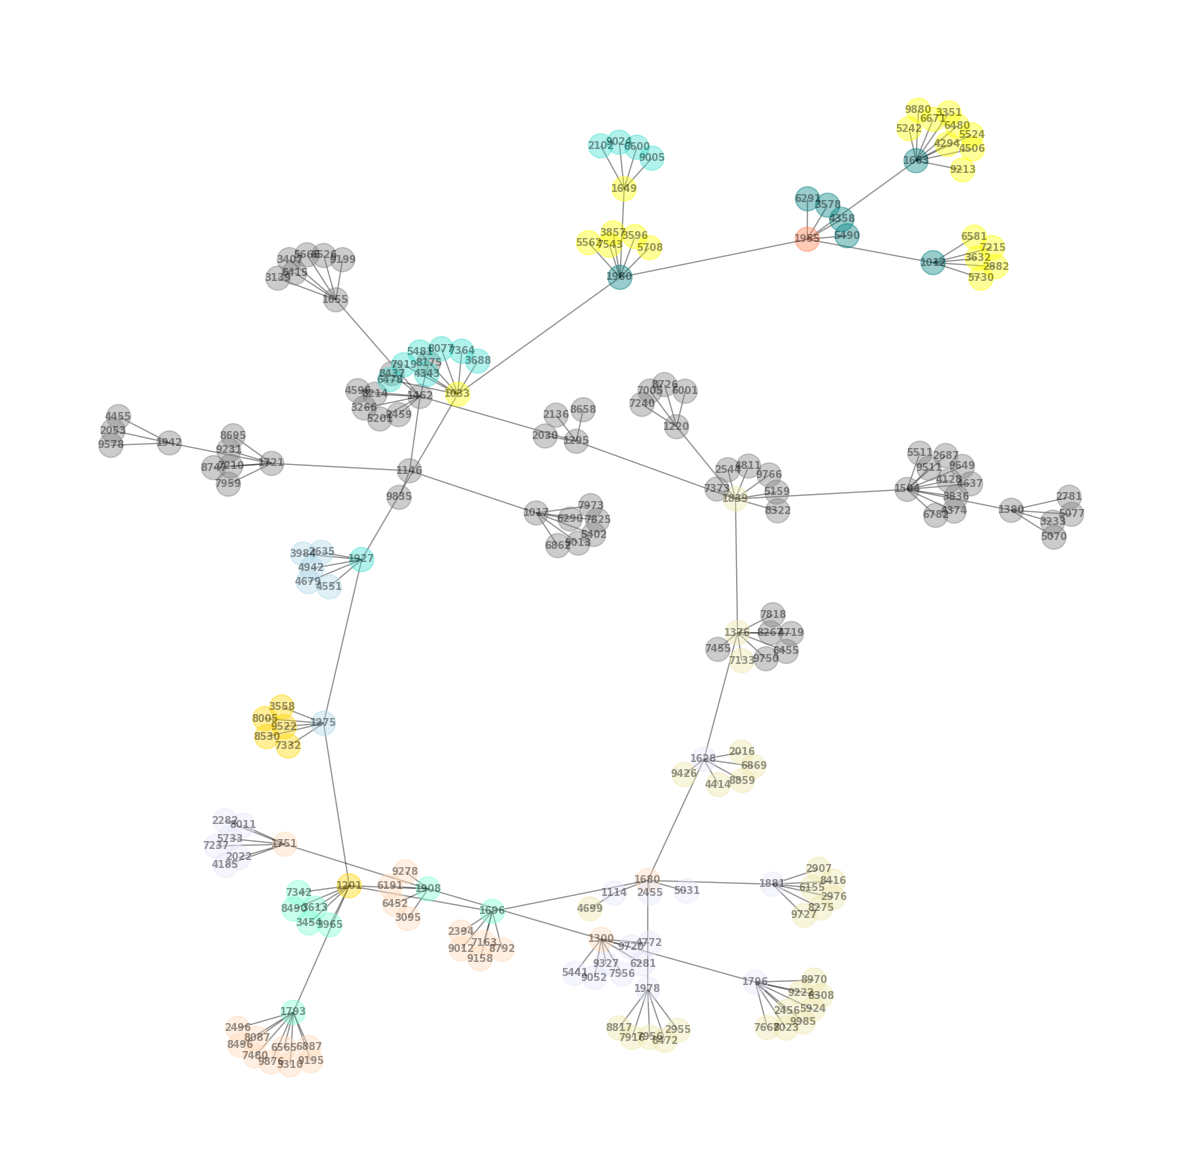

{0: ['1955'],
 1: ['1663', '1012', '3578', '1980', '5490', '4358', '6291'],
 2: ['9880',
  '5242',
  '4294',
  '9213',
  '5524',
  '6671',
  '3351',
  '6480',
  '4506',
  '6581',
  '2882',
  '5730',
  '7215',
  '3632',
  '1033',
  '7543',
  '3857',
  '5562',
  '3596',
  '5708',
  '1649'],
 3: ['1927',
  '5481',
  '3688',
  '6478',
  '4343',
  '7364',
  '8077',
  '7919',
  '9005',
  '6600',
  '9024',
  '2102'],
 4: ['1275', '4942', '2635', '4679', '4551', '3984'],
 5: ['1201', '3558', '8005', '7332', '9522', '8530'],
 6: ['3454', '7342', '3965', '1696', '3613', '1908', '8490', '1793'],
 7: ['2394',
  '8792',
  '1680',
  '7163',
  '9158',
  '9012',
  '3095',
  '9278',
  '6452',
  '1300',
  '6191',
  '1751',
  '9876',
  '2496',
  '3310',
  '6565',
  '9195',
  '6887',
  '8087',
  '7480',
  '8496'],
 8: ['1978',
  '1628',
  '1114',
  '1881',
  '2455',
  '5031',
  '4772',
  '5441',
  '9052',
  '9720',
  '7556',
  '6281',
  '9327',
  '1796',
  '2022',
  '5733',
  '4185',
  '7237',
  '8011',
 

In [26]:
# visualizing the tree using networkx library
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# deep first search algorithm to add layers
def dfs(tree,start,visited=None,depth=0):
    if visited is None:
        visited = {}
    if depth not in visited:
        visited[depth] = []
    
    visited[depth].append(start)
    depth += 1
    # searching for the children of the current node
    for next in tree[start]:
        if next not in visited:
            dfs(tree,next,visited,depth)
    return visited

# function to visualize the tree
def visualize_tree(tree,start):    
    # define the depth-first search function
    layers_tree = dfs(tree,start)
    nodes = list(tree.keys())
    adj_matrix = pd.DataFrame(0, index=nodes, columns=nodes)
    for node,neighbours in tree.items():
        for neighbour in neighbours:
            adj_matrix.loc[node,neighbour] = 1

    # create the networkx graph and plot it
    fig, ax = plt.subplots(figsize=(15, 15))
    G = nx.from_pandas_adjacency(adj_matrix)
    pos = nx.spring_layout(G)
    node_colors = []
    for node in G.nodes:
        for key,val in layers_tree.items():
            if node in val and key == 0:
                color = 'coral'
            elif node in val and key == 1:
                color = 'teal'
            elif node in val and key == 2:
                color = 'yellow'
            elif node in val and key == 3:
                color = 'turquoise'
            elif node in val and key == 4:
                color = 'lightblue'
            elif node in val and key == 5:
                color = 'gold'
            elif node in val and key == 6:
                color = 'aquamarine'
            elif node in val and key == 7:
                color = 'peachpuff'
            elif node in val and key == 8:
                color = 'lavender'
            elif node in val and key == 9:
                color = 'palegoldenrod'
            if node in val and key > 10:
                color = 'gray'
        node_colors.append(color)
    nx.draw(G, node_color=node_colors, with_labels=True, font_weight='bold', font_size=7, node_size=300, alpha=0.4,ax=ax)   
    plt.show()

    return layers_tree

# load the sample tree data
select_tree = forest[max_tree_name]
start = list(select_tree.keys())[0]
layers_tree = dfs(select_tree,start)
#print('max depth:',max(list(layers_tree.keys())))

# testing the function
visualize_tree(select_tree,start)

## visualize the longest path in the tree

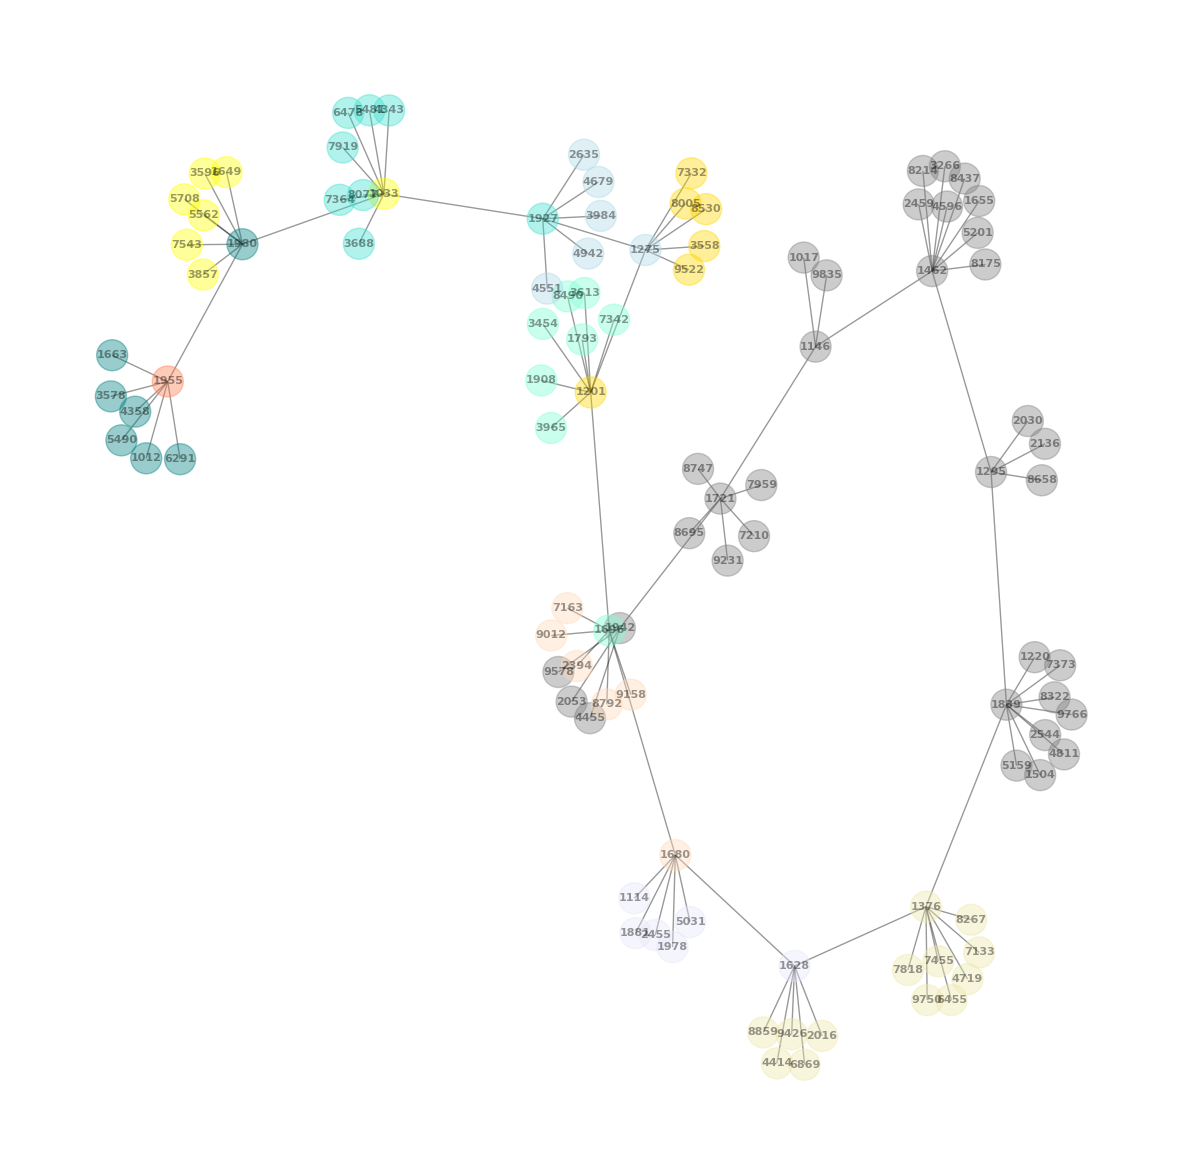

In [23]:
# finding the longest chain of tree and visualizing it using networkx library
longest_path_from_node = {}
def find_longest_path(node,tree):
    if node in longest_path_from_node:
        return longest_path_from_node[node]
    # if no children
    if not tree[node]:
        longest_path_from_node[node] = [node]
        return [node]
    max_length_path = []
    for child in tree[node]:
        child_path = find_longest_path(child,tree)
        if len(child_path) > len(max_length_path):
            max_length_path = child_path

    max_length_path.append(node)
    longest_path_from_node[node] = max_length_path
    return max_length_path

# recalling the tree
longest_path = find_longest_path(start,select_tree)
longest_chain = {}
for node in longest_path:
    longest_chain[node] = select_tree[node]
    # fill in the longest chain
    for value in select_tree[node]:
        if value not in longest_chain:
            longest_chain[value] = []

# creating adjacency matrix
longest_nodes = list(longest_chain.keys())
adj_matrix_longest = pd.DataFrame(0, index=longest_nodes, columns=longest_nodes)
for node,neighbors in longest_chain.items():
    for neighbor in neighbors:
        adj_matrix_longest.loc[node,neighbor] = 1

#  creating networkx graph
fig, ax = plt.subplots(figsize=(15, 15))
G = nx.from_pandas_adjacency(adj_matrix_longest)
#  creating node colors
pos = nx.spring_layout(G)
node_colors = []
for node in G.nodes:
    for key,val in layers_tree.items():
        if node in val and key == 0:
            color = 'coral'
        elif node in val and key == 1:
            color = 'teal'
        elif node in val and key == 2:
            color = 'yellow'
        elif node in val and key == 3:
            color = 'turquoise'
        elif node in val and key == 4:
            color = 'lightblue'
        elif node in val and key == 5:
            color = 'gold'
        elif node in val and key == 6:
            color = 'aquamarine'
        elif node in val and key == 7:
            color = 'peachpuff'
        elif node in val and key == 8:
            color = 'lavender'
        elif node in val and key == 9:
            color = 'palegoldenrod'
        if node in val and key > 10:
            color = 'gray'
    #
    node_colors.append(color)

#
nx.draw(G, node_color=node_colors, with_labels=True, font_weight='bold', font_size=8, node_size=500, alpha=0.4,ax=ax)   
plt.show()



### Save all topological features of the invitation tree to a dataframe

In [34]:
# deep first search algorithm to add layers
def dfs(tree,start,visited=None,depth=0):
    if visited is None:
        visited = {}
    if depth not in visited:
        visited[depth] = []
    
    visited[depth].append(start)
    depth += 1
    # searching for the children of the current node
    for next in tree[start]:
        if next not in visited:
            dfs(tree,next,visited,depth)
    return visited

# return layers according to id 
def get_layer(row):
    for k,v in layers.items():
        if row in v:
            value = k
            break
    return value

#
def get_tograph(forest=forest,df=df):
    # define a function to get layers of the tree
    def get_layer(row):
        for k,v in layers_tree.items():
            if row in v:
                value = k
        return value
    # 
    tograph = pd.DataFrame(columns=['id','layer','root'])
    for k,v in forest.items():
        select_tree = forest[k]
        start = list(select_tree.keys())[0]
        layers_tree = dfs(select_tree,start) # get layers of the tree
        tree_name = f'{k}' # tree name
        locals()[tree_name] = df.loc[list(select_tree),:].copy() .reset_index()
        locals()[tree_name]['layer'] = locals()[tree_name]['id'].apply(get_layer)
        locals()[tree_name] = locals()[tree_name][['id','layer']]
        locals()[tree_name]['root'] = start
        tograph = pd.concat([tograph,locals()[tree_name]],axis=0)
        
    return tograph.reset_index()[['id','layer','root']]

# recall
topgraph = get_tograph()
result = topgraph.merge(invitationship,left_on = 'id',right_on='invitee',how='left').drop(['invitee'],axis=1).fillna(0)[['id','inviter','layer','root']]
result



,id,inviter,layer,root
0,1059,0,0,1059
1,8207,1059,1,1059
2,1053,1059,1,1059
3,6722,1053,2,1059
4,6834,1053,2,1059
...,...,...,...,...
6270,8795,1526,1,1526
6271,2109,1526,1,1526
6272,1603,0,0,1603
6273,5898,1603,1,1603
